<h2>This notebook will be mainly used for the capstone project</h2>

In [1]:
#https://github.com/mtk12/IBM-Data-science-capstone-project/blob/master/Capstone-Project.ipynb
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

import json # library to handle JSON files

import geocoder as geocoder
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:
#CSV from https://www.kaggle.com/anthonypino/melbourne-housing-market#Melbourne_housing_FULL.csv
df = pd.read_csv('Melbourne_housing_FULL.csv')
df.head()

Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        nan     SS  Jellis   
1  Abbotsford        85 Turner St      2    h 1480000.00      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h 1035000.00      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        nan     VB  Rounds   
4  Abbotsford        5 Charles St      3    h 1465000.00     SP  Biggin   

        Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
0  3/09/2016      2.50   3067.00      2.00      1.00 1.00    126.00   
1  3/12/2016      2.50   3067.00      2.00      1.00 1.00    202.00   
2  4/02/2016      2.50   3067.00      2.00      1.00 0.00    156.00   
3  4/02/2016      2.50   3067.00      3.00      2.00 1.00      0.00   
4  4/03/2017      2.50   3067.00      3.00      2.00 0.00    134.00   

   BuildingArea  YearBuilt         CouncilArea  Lattitude  Longtitude  \
0           nan        nan  Yarra City Council     -37.80      145.00   
1           nan        nan  Yarra City Council     -37.80      145.00   
2         79.00    1900.00  Yarra City Council     -37.81      144.99   
3           nan        nan  Yarra City Council     -37.81      145.01   
4        150.00    1900.00  Yarra City Council     -37.81      144.99   

              Regionname  Propertycount  
0  Northern Metropolitan        4019.00  
1  Northern Metropolitan        4019.00  
2  Northern Metropolitan        4019.00  
3  Northern Metropolitan        4019.00  
4  Northern Metropolitan        4019.00

In [3]:
df.shape

(34857, 21)

In [4]:
df = df[['Suburb', 'Price', 'Postcode', 'Lattitude', 'Longtitude']]
df['Neighbourhood'] = df[['Suburb']]
df.head()

Suburb      Price  Postcode  Lattitude  Longtitude Neighbourhood
0  Abbotsford        nan   3067.00     -37.80      145.00    Abbotsford
1  Abbotsford 1480000.00   3067.00     -37.80      145.00    Abbotsford
2  Abbotsford 1035000.00   3067.00     -37.81      144.99    Abbotsford
3  Abbotsford        nan   3067.00     -37.81      145.01    Abbotsford
4  Abbotsford 1465000.00   3067.00     -37.81      144.99    Abbotsford

In [5]:
df = df.dropna()
df.reset_index(drop=True)
df = pd.DataFrame(df.groupby(['Suburb'], sort = False).mean())
df.head()

Price  Postcode  Lattitude  Longtitude
Suburb                                                  
Abbotsford   1096603.90   3067.00     -37.80      145.00
Airport West  780529.42   3042.00     -37.72      144.88
Albert Park  1983664.71   3206.00     -37.84      144.95
Alphington   1441155.56   3078.00     -37.78      145.03
Altona        872917.93   3018.00     -37.87      144.82

In [6]:
ls = []

for index, row in df.iterrows():
    ls.append((index, row['Postcode'], row['Price'], row['Lattitude'], row['Longtitude']))
data = pd.DataFrame(ls, columns = ('Suburb', 'Postcode', 'AvgPrice', 'Lattitude', 'Longtitude'))
data.head()

Suburb  Postcode   AvgPrice  Lattitude  Longtitude
0    Abbotsford   3067.00 1096603.90     -37.80      145.00
1  Airport West   3042.00  780529.42     -37.72      144.88
2   Albert Park   3206.00 1983664.71     -37.84      144.95
3    Alphington   3078.00 1441155.56     -37.78      145.03
4        Altona   3018.00  872917.93     -37.87      144.82

In [7]:
address = 'Melbourne, Victoria'

geolocator = Nominatim(user_agent="melbourne_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Melbourne are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Melbourne are -37.8142176, 144.9631608.


In [8]:
# create map of Melbourne using latitude and longitude values
map_melbourne = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, suburb in zip(data['Lattitude'], data['Longtitude'], data['Suburb']):
    label = '{}, {}'.format(data, suburb)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_melbourne)  
    
map_melbourne

In [9]:
CLIENT_ID = 'TGMPXAQXAHIPIEVB2Q2GKVVNJ34L5KX4Y5IQVQEV5JBLBHUR' # your Foursquare ID
CLIENT_SECRET = 'E3YE5OPQ0BU4HQUWNQSYLJ4EQX0W5HBDYV5XEYKLWAVFEFOR' # your Foursquare Secret
VERSION = '20180604'

In [10]:
def getBuiltUrl(neigh_lat,neigh_long,radius=1400):
    # type your answer here
    LIMIT=100
    #radius=1000
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neigh_lat, 
    neigh_long, 
    radius, 
    LIMIT)
    return url

In [11]:
data.iloc[0]

Suburb        Abbotsford
Postcode         3067.00
AvgPrice      1096603.90
Lattitude         -37.80
Longtitude        145.00
Name: 0, dtype: object

In [12]:
neigh_name, neigh_post, neigh_price, neigh_lat, neigh_long = data.iloc[0]
print('Latitude and longitude values of {} are {}, {}.'.format(neigh_name, 
                                                               neigh_lat, 
                                                               neigh_long))
results = requests.get(getBuiltUrl(neigh_lat,neigh_long)).json()
results

Latitude and longitude values of Abbotsford are -37.8040351948052, 144.99731766233762.


{'meta': {'code': 200, 'requestId': '5deef41a618f43001b1a7b22'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4b5ccacbf964a520424429e3-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/cafe_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d16d941735',
         'name': 'Café',
         'pluralName': 'Cafés',
         'primary': True,
         'shortName': 'Café'}],
       'id': '4b5ccacbf964a520424429e3',
       'location': {'address': '60 Nicholson St',
        'cc': 'AU',
        'city': 'Abbotsford',
        'country': 'Australia',
        'distance': 370,
        'formattedAddress': ['60 Nicholson St',
         'Abbotsford VIC 3067',
         'Australia'],
        'labeledLatLngs': [{'label': 'display',
          'lat': -37.8073178966101,
          

In [13]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [14]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

name                     categories    lat  \
0                      Three Bags Full                           Café -37.81   
1                   Lentil As Anything  Vegetarian / Vegan Restaurant -37.80   
2  Stomping Ground Brewery & Beer Hall                        Brewery -37.80   
3                                 Au79                           Café -37.81   
4                          Laird Hotel                        Gay Bar -37.81   

     lng  
0 145.00  
1 145.00  
2 144.99  
3 145.00  
4 144.99

In [15]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))
data.head()

100 venues were returned by Foursquare.


Suburb  Postcode   AvgPrice  Lattitude  Longtitude
0    Abbotsford   3067.00 1096603.90     -37.80      145.00
1  Airport West   3042.00  780529.42     -37.72      144.88
2   Albert Park   3206.00 1983664.71     -37.84      144.95
3    Alphington   3078.00 1441155.56     -37.78      145.03
4        Altona   3018.00  872917.93     -37.87      144.82

In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        LIMIT=100
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

## Groups error, need to try another time

In [18]:
melbourne_venues = getNearbyVenues(names=data['Suburb'], 
                                   latitudes=data['Lattitude'], 
                                   longitudes=data['Longtitude'], 
                                   radius=500)

Abbotsford
Airport West
Albert Park
Alphington
Altona
Altona North
Armadale
Ascot Vale
Ashburton
Ashwood
Avondale Heights
Balaclava
Balwyn
Balwyn North
Bentleigh
Bentleigh East
Box Hill
Braybrook
Brighton
Brighton East
Brunswick
Brunswick West
Bulleen
Burwood
Camberwell
Canterbury
Carlton North
Carnegie
Caulfield
Caulfield North
Caulfield South
Chadstone
Clifton Hill
Coburg
Coburg North
Collingwood
Doncaster
Eaglemont
Elsternwick
Elwood
Essendon
Essendon North
Fairfield
Fitzroy
Fitzroy North
Flemington
Footscray
Glen Iris
Glenroy
Gowanbrae
Hadfield
Hampton
Hampton East
Hawthorn
Heidelberg Heights
Heidelberg West
Hughesdale
Ivanhoe
Kealba
Keilor East
Kensington
Kew
Kew East
Kooyong
Maidstone
Malvern
Malvern East
Maribyrnong
Melbourne
Middle Park
Mont Albert
Moonee Ponds
Moorabbin
Newport
Niddrie
North Melbourne
Northcote
Oak Park
Oakleigh South
Parkville
Pascoe Vale
Port Melbourne
Prahran
Preston
Reservoir
Richmond
Rosanna
Seddon
South Melbourne
South Yarra
Southbank
Spotswood
St Kilda


In [19]:
print(melbourne_venues.shape)
melbourne_venues.head()

(3192, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0   Abbotsford                 -37.80                  145.00   
1   Abbotsford                 -37.80                  145.00   
2   Abbotsford                 -37.80                  145.00   
3   Abbotsford                 -37.80                  145.00   
4   Abbotsford                 -37.80                  145.00   

                      Venue  Venue Latitude  Venue Longitude  \
0           Three Bags Full          -37.81           145.00   
1  The Kitchen at Weylandts          -37.81           145.00   
2             Retreat Hotel          -37.80           145.00   
3               Laird Hotel          -37.81           144.99   
4              Salvos Store          -37.81           145.00   

           Venue Category  
0                    Café  
1                    Café  
2                     Pub  
3                 Gay Bar  
4  Thrift / Vintage Store

In [20]:
melbourne_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  Venue  \
Neighborhood                                                               
Abbotsford                             18                      18     18   
Aberfeldie                              2                       2      2   
Airport West                            3                       3      3   
Albanvale                               1                       1      1   
Albert Park                            30                      30     30   
Albion                                  1                       1      1   
Alphington                              8                       8      8   
Altona                                  1                       1      1   
Altona North                            7                       7      7   
Ardeer                                  1                       1      1   
Armadale                               12                      12     12   
Ascot Vale                             21                      21     21   
Ashburton                              10                      10     10   
Ashwood                                 4                       4      4   
Aspendale                               5                       5      5   
Aspendale Gardens                       4                       4      4   
Attwood                                 4                       4      4   
Avondale Heights                        2                       2      2   
Bacchus Marsh                           1                       1      1   
Balaclava                              47                      47     47   
Balwyn                                 17                      17     17   
Balwyn North                            2                       2      2   
Bayswater                               1                       1      1   
Bayswater North                         6                       6      6   
Beaconsfield Upper                      2                       2      2   
Beaumaris                               3                       3      3   
Bellfield                               4                       4      4   
Bentleigh                               5                       5      5   
Bentleigh East                          1                       1      1   
Black Rock                             21                      21     21   
Blackburn                              15                      15     15   
Blackburn South                         4                       4      4   
Bonbeach                                6                       6      6   
Boronia                                 1                       1      1   
Botanic Ridge                           5                       5      5   
Box Hill                                8                       8      8   
Braybrook                               6                       6      6   
Briar Hill                              5                       5      5   
Brighton                                5                       5      5   
Brighton East                          10                      10     10   
Broadmeadows                            2                       2      2   
Brookfield                              2                       2      2   
Brooklyn                                1                       1      1   
Brunswick                              45                      45     45   
Brunswick East                         33                      33     33   
Brunswick West                         10                      10     10   
Bulla                                   3                       3      3   
Bulleen                                 6                       6      6   
Bundoora                               10                      10     10   
Burnley                                16                      16     16   
Burnside                                2                       2   

In [21]:
print('There are {} uniques categories.'.format(len(melbourne_venues['Venue Category'].unique())))

There are 299 uniques categories.


In [22]:
# one hot encoding
melbourne_onehot = pd.get_dummies(melbourne_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
melbourne_onehot['Neighborhood'] = melbourne_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [melbourne_onehot.columns[-1]] + list(melbourne_onehot.columns[:-1])
london_onehot = melbourne_onehot[fixed_columns]

melbourne_onehot.head()

Accessories Store  Afghan Restaurant  African Restaurant  \
0                  0                  0                   0   
1                  0                  0                   0   
2                  0                  0                   0   
3                  0                  0                   0   
4                  0                  0                   0   

   American Restaurant  Antique Shop  Arcade  Argentinian Restaurant  \
0                    0             0       0                       0   
1                    0             0       0                       0   
2                    0             0       0                       0   
3                    0             0       0                       0   
4                    0             0       0                       0   

   Art Gallery  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0            0                    0                 0                   0   
1            0                    0                 0                   0   
2            0                    0                 0                   0   
3            0                    0                 0                   0   
4            0                    0                 0                   0   

   Australian Restaurant  Austrian Restaurant  Auto Dealership  Auto Workshop  \
0                      0                    0                0              0   
1                      0                    0                0              0   
2                      0                    0                0              0   
3                      0                    0                0              0   
4                      0                    0                0              0   

   Automotive Shop  BBQ Joint  Baby Store  Badminton Court  Bagel Shop  \
0                0          0           0                0           0   
1                0          0           0                0           0   
2                0          0           0                0           0   
3                0          0           0                0           0   
4                0          0           0                0           0   

   Bakery  Bar  Baseball Field  Basketball Court  Basketball Stadium  \
0       0    0               0                 0                   0   
1       0    0               0                 0                   0   
2       0    0               0                 0                   0   
3       0    0               0                 0                   0   
4       0    0               0                 0                   0   

   Bath House  Beach  Bed & Breakfast  Beer Bar  Beer Garden  Beer Store  \
0           0      0                0         0            0           0   
1           0      0                0         0            0           0   
2           0      0                0         0            0           0   
3           0      0                0         0            0           0   
4           0      0                0         0            0           0   

   Big Box Store  Board Shop  Boat or Ferry  Bookstore  Boutique  \
0              0           0              0          0         0   
1              0           0              0          0         0   
2              0           0              0          0         0   
3              0           0              0          0         0   
4              0           0              0          0         0   

   Bowling Alley  Bowling Green  Boxing Gym  Brazilian Restaurant  \
0              0              0           0                     0   
1              0              0           0                     0   
2              0              0           0                     0   
3              0              0           0                     0   
4              0              0           0                     0   

   Breakfast Spot  Brewery  Bridal Shop  Bubble Tea Shop  Buffet  \
0             

In [23]:
melbourne_onehot.shape

(3192, 300)

In [24]:
melbourne_grouped = melbourne_onehot.groupby('Neighborhood').mean().reset_index()
melbourne_grouped

Neighborhood  Accessories Store  Afghan Restaurant  \
0            Abbotsford               0.00               0.00   
1            Aberfeldie               0.00               0.00   
2          Airport West               0.00               0.00   
3             Albanvale               0.00               0.00   
4           Albert Park               0.00               0.00   
5                Albion               0.00               0.00   
6            Alphington               0.00               0.00   
7                Altona               0.00               0.00   
8          Altona North               0.00               0.00   
9                Ardeer               0.00               0.00   
10             Armadale               0.00               0.00   
11           Ascot Vale               0.00               0.00   
12            Ashburton               0.00               0.10   
13              Ashwood               0.00               0.00   
14            Aspendale               0.00               0.00   
15    Aspendale Gardens               0.00               0.00   
16              Attwood               0.00               0.00   
17     Avondale Heights               0.00               0.00   
18        Bacchus Marsh               0.00               0.00   
19            Balaclava               0.00               0.00   
20               Balwyn               0.00               0.00   
21         Balwyn North               0.00               0.00   
22            Bayswater               0.00               0.00   
23      Bayswater North               0.00               0.00   
24   Beaconsfield Upper               0.00               0.00   
25            Beaumaris               0.00               0.00   
26            Bellfield               0.00               0.00   
27            Bentleigh               0.00               0.00   
28       Bentleigh East               0.00               0.00   
29           Black Rock               0.00               0.00   
30            Blackburn               0.00               0.00   
31      Blackburn South               0.00               0.00   
32             Bonbeach               0.00               0.00   
33              Boronia               0.00               0.00   
34        Botanic Ridge               0.00               0.00   
35             Box Hill               0.00               0.00   
36            Braybrook               0.00               0.00   
37           Briar Hill               0.00               0.00   
38             Brighton               0.00               0.00   
39        Brighton East               0.00               0.00   
40         Broadmeadows               0.00               0.00   
41           Brookfield               0.00               0.00   
42             Brooklyn               0.00               0.00   
43            Brunswick               0.00               0.02   
44       Brunswick East               0.00               0.00   
45       Brunswick West               0.00               0.00   
46                Bulla               0.00               0.00   
47              Bulleen               0.00               0.00   
48             Bundoora               0.00               0.00   
49              Burnley               0.00               0.00   
50             Burnside               0.00               0.00   
51     Burnside Heights               0.00               0.00   
52              Burwood               0.00               0.00   
53         Burwood East               0.00               0.00   
54             Cairnlea               0.00               0.00   
55           Camberwell               0.00               0.00   
56        Campbellfield               0.00               0.00   
57           Canterbury               0.00               0.00   
58              Carlton               0.00               0.00   
59        Carlton North               0.00               0.00   
60             Carnegie               0.00    

In [25]:
a=melbourne_grouped
num_top_venues = 5

for hood in melbourne_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = a[a['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Abbotsford----
               venue  freq
0               Café  0.17
1                Pub  0.17
2            Gay Bar  0.06
3  Convenience Store  0.06
4        Coffee Shop  0.06


----Aberfeldie----
                  venue  freq
0         Grocery Store  0.50
1                  Café  0.50
2  Other Great Outdoors  0.00
3      Pedestrian Plaza  0.00
4                  Park  0.00


----Airport West----
                  venue  freq
0         Grocery Store  0.33
1              Pharmacy  0.33
2    Italian Restaurant  0.33
3  Other Great Outdoors  0.00
4      Pedestrian Plaza  0.00


----Albanvale----
                    venue  freq
0     Rental Car Location  1.00
1    Other Great Outdoors  0.00
2  Peking Duck Restaurant  0.00
3        Pedestrian Plaza  0.00
4                    Park  0.00


----Albert Park----
                       venue  freq
0                       Café  0.30
1         Italian Restaurant  0.10
2         Seafood Restaurant  0.07
3  Middle Eastern Restaurant  0.03
4     

                venue  freq
0  Italian Restaurant  0.20
1       Grocery Store  0.20
2          Food Truck  0.10
3                Café  0.10
4      Sandwich Place  0.10


----Bulla----
                    venue  freq
0                     Pub  0.67
1                  Market  0.33
2    Other Great Outdoors  0.00
3  Peking Duck Restaurant  0.00
4        Pedestrian Plaza  0.00


----Bulleen----
                  venue  freq
0  Fast Food Restaurant  0.33
1     Fish & Chips Shop  0.17
2           Pizza Place  0.17
3         Auto Workshop  0.17
4            Donut Shop  0.17


----Bundoora----
                  venue  freq
0              Pharmacy  0.20
1     Indian Restaurant  0.10
2         Grocery Store  0.10
3  Fast Food Restaurant  0.10
4             Hotel Bar  0.10


----Burnley----
                    venue  freq
0                    Café  0.25
1       Convenience Store  0.12
2               Jazz Club  0.06
3      Light Rail Station  0.06
4  Furniture / Home Store  0.06


----Burnside---

                    venue  freq
0     Lebanese Restaurant  0.25
1  Furniture / Home Store  0.25
2            Soccer Field  0.25
3             Pizza Place  0.25
4    Other Great Outdoors  0.00


----Deepdene----
                venue  freq
0                Café  0.38
1                Park  0.25
2  Light Rail Station  0.25
3                 Gym  0.12
4   Accessories Store  0.00


----Deer Park----
                    venue  freq
0        Malay Restaurant  1.00
1       Accessories Store  0.00
2  Peking Duck Restaurant  0.00
3        Pedestrian Plaza  0.00
4                    Park  0.00


----Delahey----
                           venue  freq
0                     Playground  0.50
1                   Tennis Court  0.25
2                      Bookstore  0.25
3                           Park  0.00
4  Paper / Office Supplies Store  0.00


----Derrimut----
                        venue  freq
0      Furniture / Home Store  0.25
1                        Park  0.25
2  Construction & Landscaping 

                   venue  freq
0   Other Great Outdoors  1.00
1      Accessories Store  0.00
2  Performing Arts Venue  0.00
3       Pedestrian Plaza  0.00
4                   Park  0.00


----Hadfield----
                  venue  freq
0                  Park  0.50
1           Pizza Place  0.50
2     Accessories Store  0.00
3  Other Great Outdoors  0.00
4      Pedestrian Plaza  0.00


----Hallam----
               venue  freq
0      Shopping Mall  0.25
1        Pizza Place  0.25
2      Grocery Store  0.25
3  Fish & Chips Shop  0.25
4  Accessories Store  0.00


----Hampton----
                  venue  freq
0           Sports Club  0.50
1                  Café  0.50
2     Accessories Store  0.00
3  Other Great Outdoors  0.00
4      Pedestrian Plaza  0.00


----Hampton East----
                           venue  freq
0                            Gym  0.50
1                     Playground  0.50
2              Accessories Store  0.00
3                           Park  0.00
4  Paper / Office Su

                  venue  freq
0     Convenience Store  0.50
1            Playground  0.50
2     Accessories Store  0.00
3  Other Great Outdoors  0.00
4      Pedestrian Plaza  0.00


----Lilydale----
                  venue  freq
0  Fast Food Restaurant  0.40
1  Gym / Fitness Center  0.20
2                 Motel  0.20
3       Bed & Breakfast  0.20
4     Other Repair Shop  0.00


----Lower Plenty----
             venue  freq
0       Whisky Bar  0.25
1    Grocery Store  0.25
2  Thai Restaurant  0.25
3      Fish Market  0.25
4  Nature Preserve  0.00


----Lynbrook----
                   venue  freq
0                 Bakery  0.12
1  Australian Restaurant  0.12
2           Burger Joint  0.12
3   Gym / Fitness Center  0.12
4                   Café  0.12


----Lysterfield----
                        venue  freq
0  Construction & Landscaping  1.00
1           Accessories Store  0.00
2        Other Great Outdoors  0.00
3      Peking Duck Restaurant  0.00
4            Pedestrian Plaza  0.00


---

4                   Park  0.00


----Officer----
                    venue  freq
0                   Trail  0.50
1                    Park  0.50
2    Other Great Outdoors  0.00
3  Peking Duck Restaurant  0.00
4        Pedestrian Plaza  0.00


----Ormond----
                           venue  freq
0               Greek Restaurant  0.06
1  Vegetarian / Vegan Restaurant  0.06
2                  Grocery Store  0.06
3               Sushi Restaurant  0.06
4           Gym / Fitness Center  0.06


----Pakenham----
                     venue  freq
0   Furniture / Home Store  0.33
1                     Park  0.33
2  Health & Beauty Service  0.33
3        Accessories Store  0.00
4     Other Great Outdoors  0.00


----Parkdale----
               venue  freq
0        Music Venue  0.25
1        Golf Course  0.25
2  Indian Restaurant  0.25
3        Pizza Place  0.25
4  Accessories Store  0.00


----Parkville----
                venue  freq
0         Zoo Exhibit  0.43
1                Park  0.14
2  Lig

                  venue  freq
0                  Café  0.21
1                Bakery  0.14
2  Fast Food Restaurant  0.07
3         Deli / Bodega  0.07
4          Burger Joint  0.07


----Strathmore Heights----
                    venue  freq
0           Moving Target  0.33
1          Baseball Field  0.33
2         Auto Dealership  0.33
3               Pet Store  0.00
4  Peking Duck Restaurant  0.00


----Sunbury----
                   venue  freq
0             Restaurant  0.20
1                   Lake  0.20
2  Portuguese Restaurant  0.20
3       Football Stadium  0.20
4     Italian Restaurant  0.20


----Sunshine----
                   venue  freq
0  Vietnamese Restaurant  0.17
1      Electronics Store  0.17
2     Chinese Restaurant  0.17
3   Gym / Fitness Center  0.08
4               Bus Line  0.08


----Sunshine North----
                        venue  freq
0                  Restaurant  0.33
1  Construction & Landscaping  0.33
2    Mediterranean Restaurant  0.33
3        Other Great 

                venue  freq
0  Athletics & Sports  0.25
1                Park  0.25
2           Locksmith  0.25
3              Bakery  0.25
4           Newsstand  0.00


----Yarra Glen----
             venue  freq
0             Café  0.50
1           Bakery  0.12
2  Bed & Breakfast  0.12
3    Grocery Store  0.12
4        Wine Shop  0.12


----Yarraville----
                  venue  freq
0    Chinese Restaurant  0.11
1     Convenience Store  0.11
2    Miscellaneous Shop  0.11
3  Fast Food Restaurant  0.11
4                  Café  0.11




In [26]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [73]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = a['Neighborhood']

for ind in np.arange(a.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(a.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0    Abbotsford                 Price                   Pub   
1    Aberfeldie         Grocery Store                  Café   
2  Airport West                 Price              Pharmacy   
3     Albanvale   Rental Car Location                 Price   
4   Albert Park                  Café                 Price   

  3rd Most Common Venue   4th Most Common Venue 5th Most Common Venue  \
0                  Café  Thrift / Vintage Store             Hotel Bar   
1                 Price             Fish Market           Flea Market   
2         Grocery Store      Italian Restaurant   American Restaurant   
3     Afghan Restaurant    Fast Food Restaurant     Fish & Chips Shop   
4    Italian Restaurant      Seafood Restaurant        Breakfast Spot   

  6th Most Common Venue      7th Most Common Venue 8th Most Common Venue  \
0         Grocery Store           Greek Restaurant               Gay Bar   
1           Flower Shop                       Food     Food & Drink Shop   
2         Garden Center          Fish & Chips Shop           Fish Market   
3           Fish Market                Flea Market           Flower Shop   
4    Athletics & Sports  Middle Eastern Restaurant             Bookstore   

  9th Most Common Venue 10th Most Common Venue  
0           Pizza Place     Rock Climbing Spot  
1            Food Court           Food Service  
2           Flea Market            Flower Shop  
3                  Food      Food & Drink Shop  
4      Greek Restaurant        Thai Restaurant

In [74]:
neighborhoods_venues_sorted.rename(columns = {'Neighborhood':'Suburb'}, inplace = True)
neighborhoods_venues_sorted.head()

Suburb 1st Most Common Venue 2nd Most Common Venue  \
0    Abbotsford                 Price                   Pub   
1    Aberfeldie         Grocery Store                  Café   
2  Airport West                 Price              Pharmacy   
3     Albanvale   Rental Car Location                 Price   
4   Albert Park                  Café                 Price   

  3rd Most Common Venue   4th Most Common Venue 5th Most Common Venue  \
0                  Café  Thrift / Vintage Store             Hotel Bar   
1                 Price             Fish Market           Flea Market   
2         Grocery Store      Italian Restaurant   American Restaurant   
3     Afghan Restaurant    Fast Food Restaurant     Fish & Chips Shop   
4    Italian Restaurant      Seafood Restaurant        Breakfast Spot   

  6th Most Common Venue      7th Most Common Venue 8th Most Common Venue  \
0         Grocery Store           Greek Restaurant               Gay Bar   
1           Flower Shop                       Food     Food & Drink Shop   
2         Garden Center          Fish & Chips Shop           Fish Market   
3           Fish Market                Flea Market           Flower Shop   
4    Athletics & Sports  Middle Eastern Restaurant             Bookstore   

  9th Most Common Venue 10th Most Common Venue  
0           Pizza Place     Rock Climbing Spot  
1            Food Court           Food Service  
2           Flea Market            Flower Shop  
3                  Food      Food & Drink Shop  
4      Greek Restaurant        Thai Restaurant

In [33]:
a['Price']=data['AvgPrice']

In [36]:
a.head(10)

Neighborhood  Accessories Store  Afghan Restaurant  African Restaurant  \
0    Abbotsford               0.00               0.00                0.00   
1    Aberfeldie               0.00               0.00                0.00   
2  Airport West               0.00               0.00                0.00   
3     Albanvale               0.00               0.00                0.00   
4   Albert Park               0.00               0.00                0.00   
5        Albion               0.00               0.00                0.00   
6    Alphington               0.00               0.00                0.00   
7        Altona               0.00               0.00                0.00   
8  Altona North               0.00               0.00                0.00   
9        Ardeer               0.00               0.00                0.00   

   American Restaurant  Antique Shop  Arcade  Argentinian Restaurant  \
0                 0.00          0.00    0.00                    0.00   
1                 0.00          0.00    0.00                    0.00   
2                 0.00          0.00    0.00                    0.00   
3                 0.00          0.00    0.00                    0.00   
4                 0.00          0.00    0.00                    0.00   
5                 0.00          0.00    0.00                    0.00   
6                 0.00          0.00    0.00                    0.00   
7                 0.00          0.00    0.00                    0.00   
8                 0.00          0.00    0.00                    0.00   
9                 0.00          0.00    0.00                    0.00   

   Art Gallery  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0         0.00                 0.00              0.00                0.00   
1         0.00                 0.00              0.00                0.00   
2         0.00                 0.00              0.00                0.00   
3         0.00                 0.00              0.00                0.00   
4         0.00                 0.00              0.03                0.03   
5         0.00                 0.00              0.00                0.00   
6         0.00                 0.00              0.00                0.00   
7         0.00                 0.00              0.00                0.00   
8         0.00                 0.00              0.00                0.00   
9         0.00                 0.00              0.00                0.00   

   Australian Restaurant  Austrian Restaurant  Auto Dealership  Auto Workshop  \
0                   0.00                 0.00             0.00           0.00   
1                   0.00                 0.00             0.00           0.00   
2                   0.00                 0.00             0.00           0.00   
3                   0.00                 0.00             0.00           0.00   
4                   0.03                 0.00             0.00           0.00   
5                   0.00                 0.00             0.00           0.00   
6                   0.00                 0.00             0.00           0.00   
7                   0.00                 0.00             0.00           0.00   
8                   0.00                 0.00             0.00           0.00   
9                   0.00                 0.00             0.00           0.00   

   Automotive Shop  BBQ Joint  Baby Store  Badminton Court  Bagel Shop  \
0             0.00       0.00        0.00             0.00        0.00   
1             0.00       0.00        0.00             0.00        0.00   
2             0.00       0.00        0.00             0.00        0.00   
3             0.00       0.00        0.00             0.00        0.00   
4             0.00       0.00        0.00             0.00        0.00   
5             0.00       0.00        0.00             0.00        0.00   
6             0.00       0.00        0.00             0.00        0.00   
7             0.00       0.00 

In [37]:
v= a.iloc[:, -1]
a.iloc[:,-1] = (v - v.min()) / (v.max() - v.min())

In [38]:
a.head(10)

Neighborhood  Accessories Store  Afghan Restaurant  African Restaurant  \
0    Abbotsford               0.00               0.00                0.00   
1    Aberfeldie               0.00               0.00                0.00   
2  Airport West               0.00               0.00                0.00   
3     Albanvale               0.00               0.00                0.00   
4   Albert Park               0.00               0.00                0.00   
5        Albion               0.00               0.00                0.00   
6    Alphington               0.00               0.00                0.00   
7        Altona               0.00               0.00                0.00   
8  Altona North               0.00               0.00                0.00   
9        Ardeer               0.00               0.00                0.00   

   American Restaurant  Antique Shop  Arcade  Argentinian Restaurant  \
0                 0.00          0.00    0.00                    0.00   
1                 0.00          0.00    0.00                    0.00   
2                 0.00          0.00    0.00                    0.00   
3                 0.00          0.00    0.00                    0.00   
4                 0.00          0.00    0.00                    0.00   
5                 0.00          0.00    0.00                    0.00   
6                 0.00          0.00    0.00                    0.00   
7                 0.00          0.00    0.00                    0.00   
8                 0.00          0.00    0.00                    0.00   
9                 0.00          0.00    0.00                    0.00   

   Art Gallery  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0         0.00                 0.00              0.00                0.00   
1         0.00                 0.00              0.00                0.00   
2         0.00                 0.00              0.00                0.00   
3         0.00                 0.00              0.00                0.00   
4         0.00                 0.00              0.03                0.03   
5         0.00                 0.00              0.00                0.00   
6         0.00                 0.00              0.00                0.00   
7         0.00                 0.00              0.00                0.00   
8         0.00                 0.00              0.00                0.00   
9         0.00                 0.00              0.00                0.00   

   Australian Restaurant  Austrian Restaurant  Auto Dealership  Auto Workshop  \
0                   0.00                 0.00             0.00           0.00   
1                   0.00                 0.00             0.00           0.00   
2                   0.00                 0.00             0.00           0.00   
3                   0.00                 0.00             0.00           0.00   
4                   0.03                 0.00             0.00           0.00   
5                   0.00                 0.00             0.00           0.00   
6                   0.00                 0.00             0.00           0.00   
7                   0.00                 0.00             0.00           0.00   
8                   0.00                 0.00             0.00           0.00   
9                   0.00                 0.00             0.00           0.00   

   Automotive Shop  BBQ Joint  Baby Store  Badminton Court  Bagel Shop  \
0             0.00       0.00        0.00             0.00        0.00   
1             0.00       0.00        0.00             0.00        0.00   
2             0.00       0.00        0.00             0.00        0.00   
3             0.00       0.00        0.00             0.00        0.00   
4             0.00       0.00        0.00             0.00        0.00   
5             0.00       0.00        0.00             0.00        0.00   
6             0.00       0.00        0.00             0.00        0.00   
7             0.00       0.00 

In [51]:
kclusters = 6

melbourne_grouped_clustering = a.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(melbourne_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 0, 3, 1, 0, 4, 3, 1, 3, 1])

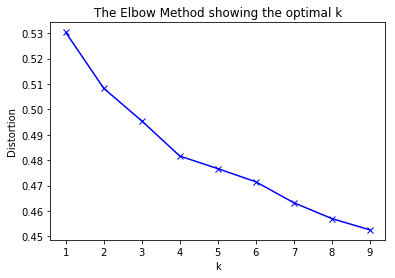

In [52]:
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(melbourne_grouped_clustering)
    kmeanModel.fit(melbourne_grouped_clustering)
    distortions.append(sum(np.min(cdist(melbourne_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / melbourne_grouped_clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [64]:
neighborhoods_venues_sorted.drop(columns = 'Cluster Labels', inplace = True)

In [75]:
neighborhoods_venues_sorted.head()

Suburb 1st Most Common Venue 2nd Most Common Venue  \
0    Abbotsford                 Price                   Pub   
1    Aberfeldie         Grocery Store                  Café   
2  Airport West                 Price              Pharmacy   
3     Albanvale   Rental Car Location                 Price   
4   Albert Park                  Café                 Price   

  3rd Most Common Venue   4th Most Common Venue 5th Most Common Venue  \
0                  Café  Thrift / Vintage Store             Hotel Bar   
1                 Price             Fish Market           Flea Market   
2         Grocery Store      Italian Restaurant   American Restaurant   
3     Afghan Restaurant    Fast Food Restaurant     Fish & Chips Shop   
4    Italian Restaurant      Seafood Restaurant        Breakfast Spot   

  6th Most Common Venue      7th Most Common Venue 8th Most Common Venue  \
0         Grocery Store           Greek Restaurant               Gay Bar   
1           Flower Shop                       Food     Food & Drink Shop   
2         Garden Center          Fish & Chips Shop           Fish Market   
3           Fish Market                Flea Market           Flower Shop   
4    Athletics & Sports  Middle Eastern Restaurant             Bookstore   

  9th Most Common Venue 10th Most Common Venue  
0           Pizza Place     Rock Climbing Spot  
1            Food Court           Food Service  
2           Flea Market            Flower Shop  
3                  Food      Food & Drink Shop  
4      Greek Restaurant        Thai Restaurant

In [76]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
melbourne_merged = data

In [77]:
neighborhoods_venues_sorted.head()

Cluster Labels        Suburb 1st Most Common Venue 2nd Most Common Venue  \
0               1    Abbotsford                 Price                   Pub   
1               0    Aberfeldie         Grocery Store                  Café   
2               3  Airport West                 Price              Pharmacy   
3               1     Albanvale   Rental Car Location                 Price   
4               0   Albert Park                  Café                 Price   

  3rd Most Common Venue   4th Most Common Venue 5th Most Common Venue  \
0                  Café  Thrift / Vintage Store             Hotel Bar   
1                 Price             Fish Market           Flea Market   
2         Grocery Store      Italian Restaurant   American Restaurant   
3     Afghan Restaurant    Fast Food Restaurant     Fish & Chips Shop   
4    Italian Restaurant      Seafood Restaurant        Breakfast Spot   

  6th Most Common Venue      7th Most Common Venue 8th Most Common Venue  \
0         Grocery Store           Greek Restaurant               Gay Bar   
1           Flower Shop                       Food     Food & Drink Shop   
2         Garden Center          Fish & Chips Shop           Fish Market   
3           Fish Market                Flea Market           Flower Shop   
4    Athletics & Sports  Middle Eastern Restaurant             Bookstore   

  9th Most Common Venue 10th Most Common Venue  
0           Pizza Place     Rock Climbing Spot  
1            Food Court           Food Service  
2           Flea Market            Flower Shop  
3                  Food      Food & Drink Shop  
4      Greek Restaurant        Thai Restaurant

In [78]:
melbourne_merged.head()

Suburb  Postcode   AvgPrice  Lattitude  Longtitude
0    Abbotsford   3067.00 1096603.90     -37.80      145.00
1  Airport West   3042.00  780529.42     -37.72      144.88
2   Albert Park   3206.00 1983664.71     -37.84      144.95
3    Alphington   3078.00 1441155.56     -37.78      145.03
4        Altona   3018.00  872917.93     -37.87      144.82

In [79]:
melbourne_merged = melbourne_merged.join(neighborhoods_venues_sorted.set_index('Suburb'), on='Suburb')
melbourne_merged

Suburb  Postcode   AvgPrice  Lattitude  Longtitude  \
0            Abbotsford   3067.00 1096603.90     -37.80      145.00   
1          Airport West   3042.00  780529.42     -37.72      144.88   
2           Albert Park   3206.00 1983664.71     -37.84      144.95   
3            Alphington   3078.00 1441155.56     -37.78      145.03   
4                Altona   3018.00  872917.93     -37.87      144.82   
5          Altona North   3025.00  828170.89     -37.83      144.85   
6              Armadale   3143.00 1590300.88     -37.86      145.02   
7            Ascot Vale   3032.00 1100420.45     -37.78      144.92   
8             Ashburton   3147.00 1743860.00     -37.87      145.08   
9               Ashwood   3147.00 1220920.45     -37.87      145.10   
10     Avondale Heights   3034.00  828106.19     -37.76      144.86   
11            Balaclava   3183.00  896184.21     -37.87      145.00   
12               Balwyn   3103.00 1990670.89     -37.81      145.08   
13         Balwyn North   3104.00 1856250.22     -37.79      145.09   
14            Bentleigh   3204.00 1349965.74     -37.92      145.04   
15       Bentleigh East   3165.00 1140139.91     -37.92      145.07   
16             Box Hill   3128.00 1382781.78     -37.82      145.13   
17            Braybrook   3019.00  721896.72     -37.79      144.85   
18             Brighton   3186.00 2086619.99     -37.91      145.00   
19        Brighton East   3187.00 1666556.22     -37.92      145.02   
20            Brunswick   3056.00 1026900.48     -37.77      144.96   
21       Brunswick West   3055.00  885080.27     -37.76      144.94   
22              Bulleen   3105.00 1176425.26     -37.77      145.09   
23              Burwood   3125.00 1308933.03     -37.85      145.11   
24           Camberwell   3124.00 1861382.32     -37.84      145.08   
25           Canterbury   3126.00 2279562.50     -37.82      145.08   
26        Carlton North   3054.00 1461892.31     -37.79      144.97   
27             Carnegie   3163.00  954113.22     -37.89      145.06   
28            Caulfield   3162.00  760423.08     -37.89      145.03   
29      Caulfield North   3161.00 1110892.86     -37.87      145.02   
30      Caulfield South   3162.00 1262471.43     -37.89      145.02   
31            Chadstone   3148.00  972235.29     -37.88      145.10   
32         Clifton Hill   3068.00 1336622.22     -37.79      145.00   
33               Coburg   3058.00  940443.94     -37.74      144.96   
34         Coburg North   3058.00  835820.22     -37.73      144.97   
35          Collingwood   3066.00  952712.33     -37.80      144.99   
36            Doncaster   3108.00 1303871.43     -37.78      145.12   
37            Eaglemont   3084.00 1774060.61     -37.76      145.06   
38          Elsternwick   3185.00 1415362.50     -37.89      145.01   
39               Elwood   3184.00 1031231.13     -37.88      144.99   
40             Essendon   3040.00 1164043.71     -37.75      144.91   
41       Essendon North   3041.00  910656.25     -37.74      144.90   
42            Fairfield   3078.00 1132422.41     -37.78      145.02   
43              Fitzroy   3065.00 1358296.30     -37.80      144.98   
44        Fitzroy North   3068.00 1361791.98     -37.78      144.98   
45           Flemington   3031.00  917632.91     -37.78      144.93   
46            Footscray   3011.00  747705.56     -37.80      144.89   
47            Glen Iris   3146.00 1692819.44     -37.86      145.07   
48              Glenroy   3046.00  695717.50     -37.70      144.92   
49            Gowanbrae   3043.00  728986.11     -37.70      144.90   
50             Hadfield   3046.00  712905.78     -37.71      144.94   
51              Hampton   3188.00 1728424.86     -37.94      145.01   
52         Hampton East   3188.00 1153488.89     -37.94      145.03   
53             Hawthorn   3122.00 1393527.20     -37.82      145.03   
54   Heidelberg Heights   3081.00  784218.50     -37.74      145.05   
55      Heidelberg West   3081.00  666244

In [80]:
melbourne_merged.dropna(inplace=True)

In [81]:
melbourne_merged.shape

(311, 16)

In [82]:
melbourne_merged['Cluster Labels'] = melbourne_merged['Cluster Labels'].astype(int)
melbourne_merged.dtypes

Suburb                     object
Postcode                  float64
AvgPrice                  float64
Lattitude                 float64
Longtitude                float64
Cluster Labels              int32
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object

In [83]:
melbourne_merged.drop_duplicates(subset='Postcode',inplace=True)
melbourne_merged.shape

(197, 16)

In [84]:
melbourne_merged.reset_index(inplace=True)
melbourne_merged.drop(columns='index',inplace=True)

In [86]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(melbourne_merged['Lattitude'],melbourne_merged['Longtitude'], melbourne_merged['Suburb'], melbourne_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [96]:
melbourne_merged

Suburb  Postcode   AvgPrice  Lattitude  Longtitude  \
0            Abbotsford   3067.00 1096603.90     -37.80      145.00   
1          Airport West   3042.00  780529.42     -37.72      144.88   
2           Albert Park   3206.00 1983664.71     -37.84      144.95   
3            Alphington   3078.00 1441155.56     -37.78      145.03   
4                Altona   3018.00  872917.93     -37.87      144.82   
5          Altona North   3025.00  828170.89     -37.83      144.85   
6              Armadale   3143.00 1590300.88     -37.86      145.02   
7            Ascot Vale   3032.00 1100420.45     -37.78      144.92   
8             Ashburton   3147.00 1743860.00     -37.87      145.08   
9      Avondale Heights   3034.00  828106.19     -37.76      144.86   
10            Balaclava   3183.00  896184.21     -37.87      145.00   
11               Balwyn   3103.00 1990670.89     -37.81      145.08   
12         Balwyn North   3104.00 1856250.22     -37.79      145.09   
13            Bentleigh   3204.00 1349965.74     -37.92      145.04   
14       Bentleigh East   3165.00 1140139.91     -37.92      145.07   
15             Box Hill   3128.00 1382781.78     -37.82      145.13   
16            Braybrook   3019.00  721896.72     -37.79      144.85   
17             Brighton   3186.00 2086619.99     -37.91      145.00   
18        Brighton East   3187.00 1666556.22     -37.92      145.02   
19            Brunswick   3056.00 1026900.48     -37.77      144.96   
20       Brunswick West   3055.00  885080.27     -37.76      144.94   
21              Bulleen   3105.00 1176425.26     -37.77      145.09   
22              Burwood   3125.00 1308933.03     -37.85      145.11   
23           Camberwell   3124.00 1861382.32     -37.84      145.08   
24           Canterbury   3126.00 2279562.50     -37.82      145.08   
25        Carlton North   3054.00 1461892.31     -37.79      144.97   
26             Carnegie   3163.00  954113.22     -37.89      145.06   
27            Caulfield   3162.00  760423.08     -37.89      145.03   
28      Caulfield North   3161.00 1110892.86     -37.87      145.02   
29            Chadstone   3148.00  972235.29     -37.88      145.10   
30         Clifton Hill   3068.00 1336622.22     -37.79      145.00   
31               Coburg   3058.00  940443.94     -37.74      144.96   
32          Collingwood   3066.00  952712.33     -37.80      144.99   
33            Doncaster   3108.00 1303871.43     -37.78      145.12   
34            Eaglemont   3084.00 1774060.61     -37.76      145.06   
35          Elsternwick   3185.00 1415362.50     -37.89      145.01   
36               Elwood   3184.00 1031231.13     -37.88      144.99   
37             Essendon   3040.00 1164043.71     -37.75      144.91   
38       Essendon North   3041.00  910656.25     -37.74      144.90   
39              Fitzroy   3065.00 1358296.30     -37.80      144.98   
40           Flemington   3031.00  917632.91     -37.78      144.93   
41            Footscray   3011.00  747705.56     -37.80      144.89   
42            Glen Iris   3146.00 1692819.44     -37.86      145.07   
43              Glenroy   3046.00  695717.50     -37.70      144.92   
44            Gowanbrae   3043.00  728986.11     -37.70      144.90   
45              Hampton   3188.00 1728424.86     -37.94      145.01   
46             Hawthorn   3122.00 1393527.20     -37.82      145.03   
47   Heidelberg Heights   3081.00  784218.50     -37.74      145.05   
48           Hughesdale   3166.00 1113511.63     -37.90      145.08   
49              Ivanhoe   3079.00 1266603.05     -37.77      145.04   
50               Kealba   3021.00  602037.04     -37.73      144.82   
51          Keilor East   3033.00  837504.55     -37.74      144.87   
52                  Kew   3101.00 1868016.74     -37.80      145.04   
53             Kew East   3102.00 1744630.14     -37.79      145.05   
54              Kooyong   3144.00 2423333.33     -37.84      145.03   
55            Maidstone   3012.00  731805

Text(0.5,1,'Price bins')

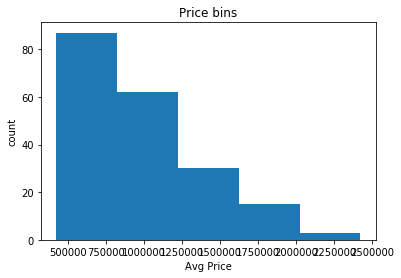

In [231]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(melbourne_merged["AvgPrice"],bins=5)

# set x/y labels and plot title
plt.pyplot.xlabel("Avg Price")
plt.pyplot.ylabel("count")
plt.pyplot.title("Price bins")

In [232]:
bins = np.linspace(min(melbourne_merged["AvgPrice"]), max(melbourne_merged["AvgPrice"]), 6)
bins

array([ 423000.        ,  823066.66666667, 1223133.33333333,
       1623200.        , 2023266.66666667, 2423333.33333333])

In [233]:
group_names = ['Low Level', 'Below Average', 'Average', 'Above Average', 'High Level']

In [234]:
melbourne_merged['Price-Categories'] = pd.cut(melbourne_merged['AvgPrice'], bins, labels=group_names, include_lowest=True )
melbourne_merged[['AvgPrice','Price-Categories']].head(10)

AvgPrice Price-Categories
0 1096603.90    Below Average
1  780529.42        Low Level
2 1983664.71    Above Average
3 1441155.56          Average
4  872917.93    Below Average
5  828170.89    Below Average
6 1590300.88          Average
7 1100420.45    Below Average
8 1743860.00    Above Average
9  828106.19    Below Average

Text(0.5,1,'Cluster Labels')

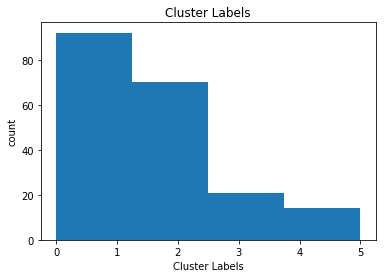

In [235]:
plt.pyplot.hist(melbourne_merged["Cluster Labels"],bins=4)

# set x/y labels and plot title
plt.pyplot.xlabel("Cluster Labels")
plt.pyplot.ylabel("count")
plt.pyplot.title("Cluster Labels")

In [236]:
bins = np.linspace(min(melbourne_merged["Cluster Labels"]), max(melbourne_merged["Cluster Labels"]), 7)
bins

array([0.        , 0.83333333, 1.66666667, 2.5       , 3.33333333,
       4.16666667, 5.        ])

In [237]:
group_names = ['Café','Mixed Social Venues','Bars, Store and Restaurant','Shops', 'Parks and places','Pubs and markets']

In [238]:
melbourne_merged['Cluster-Category'] = pd.cut(melbourne_merged['Cluster Labels'], bins, labels=group_names, include_lowest=True )
melbourne_merged[['Cluster Labels','Cluster-Category']].head()

Cluster Labels     Cluster-Category
0               1  Mixed Social Venues
1               3                Shops
2               0                 Café
3               3                Shops
4               1  Mixed Social Venues

# Finale

In [242]:
melbourne_merged.drop(columns=['6th Most Common Venue','7th Most Common Venue','8th Most Common Venue','9th Most Common Venue','10th Most Common Venue'],inplace=True)
melbourne_merged.head(20)

Suburb  Postcode   AvgPrice  Lattitude  Longtitude  \
0         Abbotsford   3067.00 1096603.90     -37.80      145.00   
1       Airport West   3042.00  780529.42     -37.72      144.88   
2        Albert Park   3206.00 1983664.71     -37.84      144.95   
3         Alphington   3078.00 1441155.56     -37.78      145.03   
4             Altona   3018.00  872917.93     -37.87      144.82   
5       Altona North   3025.00  828170.89     -37.83      144.85   
6           Armadale   3143.00 1590300.88     -37.86      145.02   
7         Ascot Vale   3032.00 1100420.45     -37.78      144.92   
8          Ashburton   3147.00 1743860.00     -37.87      145.08   
9   Avondale Heights   3034.00  828106.19     -37.76      144.86   
10         Balaclava   3183.00  896184.21     -37.87      145.00   
11            Balwyn   3103.00 1990670.89     -37.81      145.08   
12      Balwyn North   3104.00 1856250.22     -37.79      145.09   
13         Bentleigh   3204.00 1349965.74     -37.92      145.04   
14    Bentleigh East   3165.00 1140139.91     -37.92      145.07   
15          Box Hill   3128.00 1382781.78     -37.82      145.13   
16         Braybrook   3019.00  721896.72     -37.79      144.85   
17          Brighton   3186.00 2086619.99     -37.91      145.00   
18     Brighton East   3187.00 1666556.22     -37.92      145.02   
19         Brunswick   3056.00 1026900.48     -37.77      144.96   

    Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0                1                 Price                   Pub   
1                3                 Price              Pharmacy   
2                0                  Café                 Price   
3                3                 Price         Train Station   
4                1           Pizza Place                 Price   
5                3                 Price  Fast Food Restaurant   
6                0                  Café                 Price   
7                0                 Price                  Café   
8                3                 Price                  Café   
9                2                Bakery                Market   
10               3                 Price                  Café   
11               0                 Price                  Café   
12               4            Baby Store                  Park   
13               2                 Price            Playground   
14               2             Gift Shop                 Price   
15               1     Korean Restaurant                 Price   
16               4                 Price                  Park   
17               0                 Price                  Café   
18               1                 Price    Light Rail Station   
19               1                 Price                  Café   

    3rd Most Common Venue    4th Most Common Venue 5th Most Common Venue  \
0                    Café   Thrift / Vintage Store             Hotel Bar   
1           Grocery Store       Italian Restaurant   American Restaurant   
2      Italian Restaurant       Seafood Restaurant        Breakfast Spot   
3            Liquor Store     Gym / Fitness Center  Fast Food Restaurant   
4       Food & Drink Shop      Filipino Restaurant     Fish & Chips Shop   
5          Sandwich Place                 Pharmacy        Shop & Service   
6      Light Rail Station            Grocery Store          Liquor Store   
7                  Bakery       Light Rail Station           Pizza Place   
8                    Pool             Soccer Field     Fish & Chips Shop   
9                   Price               Food Court           Fish Market   
10            Coffee Shop              Pizza Place    Light Rail Station   
11                 Bakery                 Pharmacy   Japanese Restaurant   
12                  Price  Fruit & Vegetable Store    Frozen Yogurt Shop   
13       Malay Restaurant            Train Station           Coffee Shop   
14           Food Service        Fish & Chips Shop        

In [243]:
# add markers to the map
mel_map = folium.Map(location = [latitude, longitude], zoom_start = 11)
markers_colors = []
for lat, lon, poi, cluster in zip(melbourne_merged['Lattitude'],melbourne_merged['Longtitude'], melbourne_merged['Suburb'], melbourne_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(mel_map)
       
# display map
mel_map

In [244]:
cafe_df = melbourne_merged[melbourne_merged['Cluster Labels']==0]
cafe_df.describe()

Postcode   AvgPrice  Lattitude  Longtitude  Cluster Labels
count     41.00      41.00      41.00       41.00           41.00
mean    3177.98 1129945.10     -37.80      145.03            0.00
std      215.09  429416.03       0.11        0.16            0.00
min     3002.00  515333.33     -38.00      144.60            0.00
25%     3054.00  784218.50     -37.86      144.95            0.00
50%     3121.00 1082708.33     -37.81      145.01            0.00
75%     3186.00 1405459.57     -37.76      145.08            0.00
max     3796.00 2086619.99     -37.46      145.44            0.00

In [245]:
mixed_df = melbourne_merged[melbourne_merged['Cluster Labels']==1]
mixed_df.describe()

Postcode   AvgPrice  Lattitude  Longtitude  Cluster Labels
count     51.00      51.00      51.00       51.00           51.00
mean    3139.90  952862.73     -37.79      145.00            1.00
std      157.04  360168.62       0.13        0.17            0.00
min     3000.00  434583.33     -38.15      144.57            1.00
25%     3055.50  677263.17     -37.85      144.93            1.00
50%     3095.00  926138.58     -37.79      145.01            1.00
75%     3178.00 1139798.32     -37.73      145.13            1.00
max     3803.00 2279562.50     -37.41      145.28            1.00

In [246]:
restau_df = melbourne_merged[melbourne_merged['Cluster Labels']==2]
restau_df.describe()

Postcode   AvgPrice  Lattitude  Longtitude  Cluster Labels
count     70.00      70.00      70.00       70.00           70.00
mean    3204.79  950483.43     -37.83      145.06            2.00
std      243.43  384788.08       0.13        0.16            0.00
min     3006.00  489151.61     -38.15      144.62            2.00
25%     3080.25  676768.62     -37.92      144.97            2.00
50%     3140.50  829187.03     -37.82      145.06            2.00
75%     3179.50 1086275.40     -37.73      145.16            2.00
max     3977.00 2423333.33     -37.58      145.38            2.00

In [247]:
#shops
shops_df = melbourne_merged[melbourne_merged['Cluster Labels']==3]
shops_df.describe()

Postcode   AvgPrice  Lattitude  Longtitude  Cluster Labels
count     21.00      21.00      21.00       21.00           21.00
mean    3262.62  943608.36     -37.85      145.07            3.00
std      294.63  382689.48       0.14        0.23            0.00
min     3023.00  423000.00     -38.10      144.43            3.00
25%     3078.00  688000.00     -37.98      144.98            3.00
50%     3161.00  780529.42     -37.81      145.08            3.00
75%     3201.00 1176425.26     -37.73      145.16            3.00
max     3976.00 1750591.67     -37.65      145.53            3.00

In [248]:
#park
parks_df = melbourne_merged[melbourne_merged['Cluster Labels']==4]
parks_df.describe()

Postcode   AvgPrice  Lattitude  Longtitude  Cluster Labels
count     11.00      11.00      11.00       11.00           11.00
mean    3373.82  906510.85     -37.89      145.22            4.00
std      381.65  487295.96       0.13        0.23            0.00
min     3019.00  499772.73     -38.11      144.82            4.00
25%     3110.00  598393.52     -37.99      145.08            4.00
50%     3158.00  721896.72     -37.88      145.32            4.00
75%     3801.00  885100.00     -37.79      145.37            4.00
max     3978.00 1861382.32     -37.73      145.47            4.00

In [249]:
#pubs
pubs_df = melbourne_merged[melbourne_merged['Cluster Labels']==5]
pubs_df.describe()

Postcode   AvgPrice  Lattitude  Longtitude  Cluster Labels
count      3.00       3.00       3.00        3.00            3.00
mean    3235.00 1017401.93     -37.79      145.05            5.00
std      167.69  326253.55       0.13        0.22            0.00
min     3125.00  665000.00     -37.87      144.80            5.00
25%     3138.50  871636.38     -37.86      144.96            5.00
50%     3152.00 1078272.75     -37.85      145.11            5.00
75%     3290.00 1193602.89     -37.74      145.17            5.00
max     3428.00 1308933.03     -37.64      145.23            5.00

In [251]:
melbourne_merged[melbourne_merged['Price-Categories']=='Low Level']

Suburb  Postcode  AvgPrice  Lattitude  Longtitude  \
1          Airport West   3042.00 780529.42     -37.72      144.88   
16            Braybrook   3019.00 721896.72     -37.79      144.85   
27            Caulfield   3162.00 760423.08     -37.89      145.03   
41            Footscray   3011.00 747705.56     -37.80      144.89   
43              Glenroy   3046.00 695717.50     -37.70      144.92   
44            Gowanbrae   3043.00 728986.11     -37.70      144.90   
47   Heidelberg Heights   3081.00 784218.50     -37.74      145.05   
50               Kealba   3021.00 602037.04     -37.73      144.82   
55            Maidstone   3012.00 731805.07     -37.78      144.88   
57            Melbourne   3000.00 613490.00     -37.81      144.96   
66          Pascoe Vale   3044.00 792769.23     -37.72      144.94   
70            Reservoir   3073.00 720523.40     -37.71      145.01   
74            Southbank   3006.00 621011.11     -37.83      144.96   
76             Sunshine   3020.00 747830.91     -37.79      144.84   
80             Watsonia   3087.00 773175.34     -37.71      145.08   
86        Campbellfield   3061.00 555900.00     -37.68      144.96   
89              Fawkner   3060.00 678886.08     -37.71      144.97   
91               Jacana   3047.00 536394.74     -37.69      144.91   
92            Kingsbury   3083.00 755227.32     -37.71      145.03   
94            Bayswater   3153.00 769555.56     -37.85      145.26   
97           Briar Hill   3088.00 768970.59     -37.71      145.12   
98     Burnside Heights   3023.00 632625.00     -37.73      144.76   
101         Craigieburn   3064.00 568427.06     -37.59      144.92   
102          Cranbourne   3977.00 654400.80     -38.10      145.28   
104           Dandenong   3175.00 658030.30     -37.98      145.21   
105       Diamond Creek   3089.00 798350.00     -37.68      145.16   
109              Epping   3076.00 602198.41     -37.64      145.03   
111           Frankston   3199.00 684404.26     -38.15      145.14   
112     Frankston North   3200.00 508833.33     -38.12      145.15   
113              Hallam   3803.00 713722.22     -38.00      145.27   
114         Healesville   3777.00 688000.00     -37.65      145.53   
116            Hillside   3037.00 683521.43     -37.69      144.74   
117        Keilor Downs   3038.00 691308.85     -37.72      144.81   
118         Keysborough   3173.00 811903.85     -37.99      145.16   
119               Lalor   3075.00 664043.75     -37.67      145.02   
121              Melton   3337.00 434583.33     -37.68      144.58   
122           Mill Park   3082.00 671004.91     -37.67      145.06   
127        Narre Warren   3805.00 644653.85     -38.02      145.31   
128          Point Cook   3030.00 664907.01     -37.90      144.74   
130            Rockbank   3335.00 507500.00     -37.73      144.67   
133             Seaford   3198.00 747596.77     -38.11      145.14   
134        South Morang   3752.00 645268.12     -37.64      145.08   
136             Sunbury   3429.00 545050.44     -37.58      144.72   
137             Tarneit   3029.00 517519.23     -37.85      144.67   
138           The Basin   3154.00 584550.00     -37.86      145.31   
139          Thomastown   3074.00 671921.88     -37.68      145.01   
142         Westmeadows   3049.00 639566.18     -37.68      144.89   
143    Williams Landing   3027.00 631666.67     -37.86      144.74   
144             Wollert   3750.00 591555.81     -37.61      145.03   
145        Wyndham Vale   3024.00 489151.61     -37.89      144.62   
148              Carrum   3197.00 740733.33     -38.08      145.13   
150             Doveton   3177.00 540843.75     -37.99      145.24   
151      Ferntree Gully   3156.00 806269.76     -37.88      145.28   
153           Greenvale   3059.00 784423.73     -37.64      144.89   
154        Melton South   3338.00 436965.00     -37.71      144.57   
156         Mooroolbark   3138.00 763441.18     -37.78      145.32   
158            Seabrook   3

In [290]:
def get_averages(data):
    l1_df = data[data['Price-Categories']=='Low Level']
    v1 = l1_df['AvgPrice'].describe().loc['mean']
    l2_df = data[data['Price-Categories']=='Below Average']
    v2 = l2_df['AvgPrice'].describe().loc['mean']
    a1_df = data[data['Price-Categories']=='Average']
    v3 = a1_df['AvgPrice'].describe().loc['mean']
    a2_df = data[data['Price-Categories']=='Above Average']
    v4 = a2_df['AvgPrice'].describe().loc['mean']
    aa_df = data[data['Price-Categories']=='High Level']
    v5 = aa_df['AvgPrice'].describe().loc['mean']
    return [v1, v2, v3, v4, v5]

In [291]:
list1 = get_averages(cafe_df)
list2 = get_averages(mixed_df)
list3 = get_averages(restau_df)
list4 = get_averages(shops_df)
list5 = get_averages(parks_df)
list6 = get_averages(pubs_df)

df = pd.DataFrame(list(zip(list1, list2, list3, list4, list5, list6)), index =['Low Level', 'Below Average', 'Average', 'Above Average','High Level'], 
                                              columns =['Café', 'Mixed Social Venues', 'Bars/Store/Restaurant','Shops', 'Parks/Places','Pubs/Markets']) 
df

Café  Mixed Social Venues  Bars/Store/Restaurant  \
Low Level      690312.48            622536.04              676052.28   
Below Average 1050934.84            996854.41              962482.67   
Average       1425036.25           1362452.41             1390169.05   
Above Average 1828042.01           1666556.22             1765751.65   
High Level    2086619.99           2279562.50             2423333.33   

                   Shops  Parks/Places  Pubs/Markets  
Low Level      662906.31     640540.97     665000.00  
Below Average  984402.94     885100.00    1078272.75  
Average       1369113.25           nan    1308933.03  
Above Average 1747225.83    1858816.27           nan  
High Level           nan           nan           nan

In [295]:
list1

[690312.477244667,
 1050934.838259584,
 1425036.2548992625,
 1828042.0057760752,
 2086619.991902834]

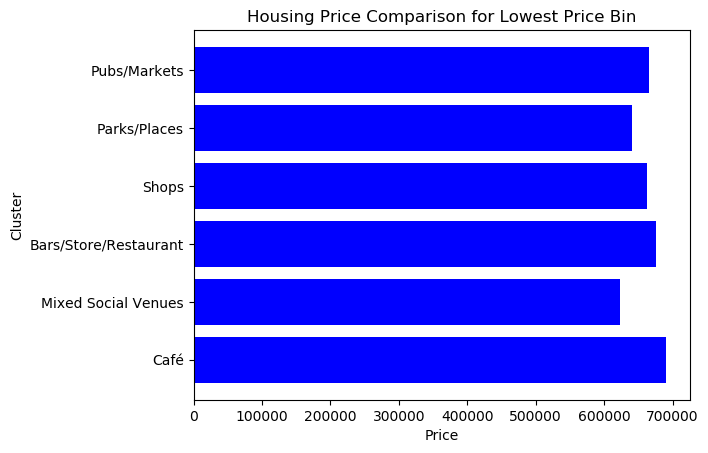

In [296]:
x = ['Café', 'Mixed Social Venues', 'Bars/Store/Restaurant','Shops', 'Parks/Places','Pubs/Markets']
energy =  [list1[0], list2[0], list3[0], list4[0], list5[0], list6[0]]

x_pos = [i for i, _ in enumerate(x)]

plt.barh(x_pos, energy, color='blue')
plt.ylabel("Cluster")
plt.xlabel("Price")
plt.title("Housing Price Comparison for Lowest Price Bin")

plt.yticks(x_pos, x)

plt.show()